In [16]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [30]:
lr = 0.01
epochs = 5000
disp_step = 50

In [18]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])


n_samples = train_X.shape[0]

In [19]:
# VARS
# i/o
X = tf.placeholder("float")
Y = tf.placeholder("float")

# weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


In [20]:
# MODEL
pred = tf.add(tf.multiply(X, W), b)

In [21]:
# EVALUATION (MSE)
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2 * n_samples)

In [22]:
# OPTIMISATION 
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [23]:
# INIT vars
init = tf.global_variables_initializer()

In [31]:
# Execute GRAPH
with tf.Session() as s:
    s.run(init)
    
    # Fit data using OPTIMISATION
    for epoch in range(epochs):
        for x, y in zip(train_X, train_Y):
            s.run(optimizer, feed_dict={X: x, Y: y})
    
        # calculate current COST after epoch on the whole training data
        if (epoch+1) % disp_step == 0:
            c = s.run(cost, feed_dict={X: x, Y: y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", s.run(W), "b=", s.run(b)
    
    # DONE
    print "Optimization Finished!"
    training_cost = s.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", s.run(W), "b=", s.run(b), '\n'
    
    Wbest = s.run(W)
    bbest = s.run(b)

Epoch: 0050 cost= 0.021434914 W= 0.525343 b= -1.18225
Epoch: 0100 cost= 0.018195949 W= 0.508943 b= -1.06427
Epoch: 0150 cost= 0.015391551 W= 0.493518 b= -0.95331
Epoch: 0200 cost= 0.012967967 W= 0.479011 b= -0.848945
Epoch: 0250 cost= 0.010877874 W= 0.465366 b= -0.750787
Epoch: 0300 cost= 0.009079620 W= 0.452533 b= -0.658467
Epoch: 0350 cost= 0.007536455 W= 0.440464 b= -0.571638
Epoch: 0400 cost= 0.006216154 W= 0.429112 b= -0.489973
Epoch: 0450 cost= 0.005090304 W= 0.418435 b= -0.413165
Epoch: 0500 cost= 0.004133976 W= 0.408393 b= -0.340925
Epoch: 0550 cost= 0.003325244 W= 0.398948 b= -0.272982
Epoch: 0600 cost= 0.002644869 W= 0.390066 b= -0.209079
Epoch: 0650 cost= 0.002075942 W= 0.381711 b= -0.148977
Epoch: 0700 cost= 0.001603651 W= 0.373853 b= -0.0924497
Epoch: 0750 cost= 0.001215001 W= 0.366463 b= -0.0392842
Epoch: 0800 cost= 0.000898604 W= 0.359512 b= 0.0107193
Epoch: 0850 cost= 0.000644488 W= 0.352975 b= 0.0577488
Epoch: 0900 cost= 0.000443938 W= 0.346826 b= 0.101981
Epoch: 0950 

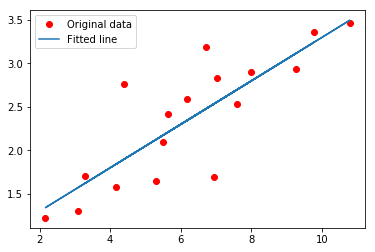

In [32]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, Wbest * train_X + bbest, label='Fitted line')
plt.legend()
plt.show()